<a href="https://colab.research.google.com/github/Sanaullah-khaskheli/Pre-Flood-ChatBot/blob/main/Daily_Rainfall_prediction_usingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install --upgrade tensorflow
!pip install keras==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
#from tensorflow.keras import layers  # Modify this line
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense

In [3]:
dataset =  pd.read_csv('/content/drive/MyDrive/AI Flood Alert Chatbot (1)/Metrological datasets/Sukkur_Daily_Data.csv')
print(dataset)

                 date_time  maxtempC  mintempC  totalSnow_cm  sunHour  \
0      2009-01-01 00:00:00        23        13             0       10   
1      2009-01-01 03:00:00        23        13             0       10   
2      2009-01-01 06:00:00        23        13             0       10   
3      2009-01-01 09:00:00        23        13             0       10   
4      2009-01-01 12:00:00        23        13             0       10   
...                    ...       ...       ...           ...      ...   
43803  2023-12-30 09:00:00        27        16             0       10   
43804  2023-12-30 12:00:00        27        16             0       10   
43805  2023-12-30 15:00:00        27        16             0       10   
43806  2023-12-30 18:00:00        27        16             0       10   
43807  2023-12-30 21:00:00        27        16             0       10   

       uvIndex  moon_illumination  moonrise   moonset   sunrise  ...  \
0            5                 31  10:14 AM  10:02 

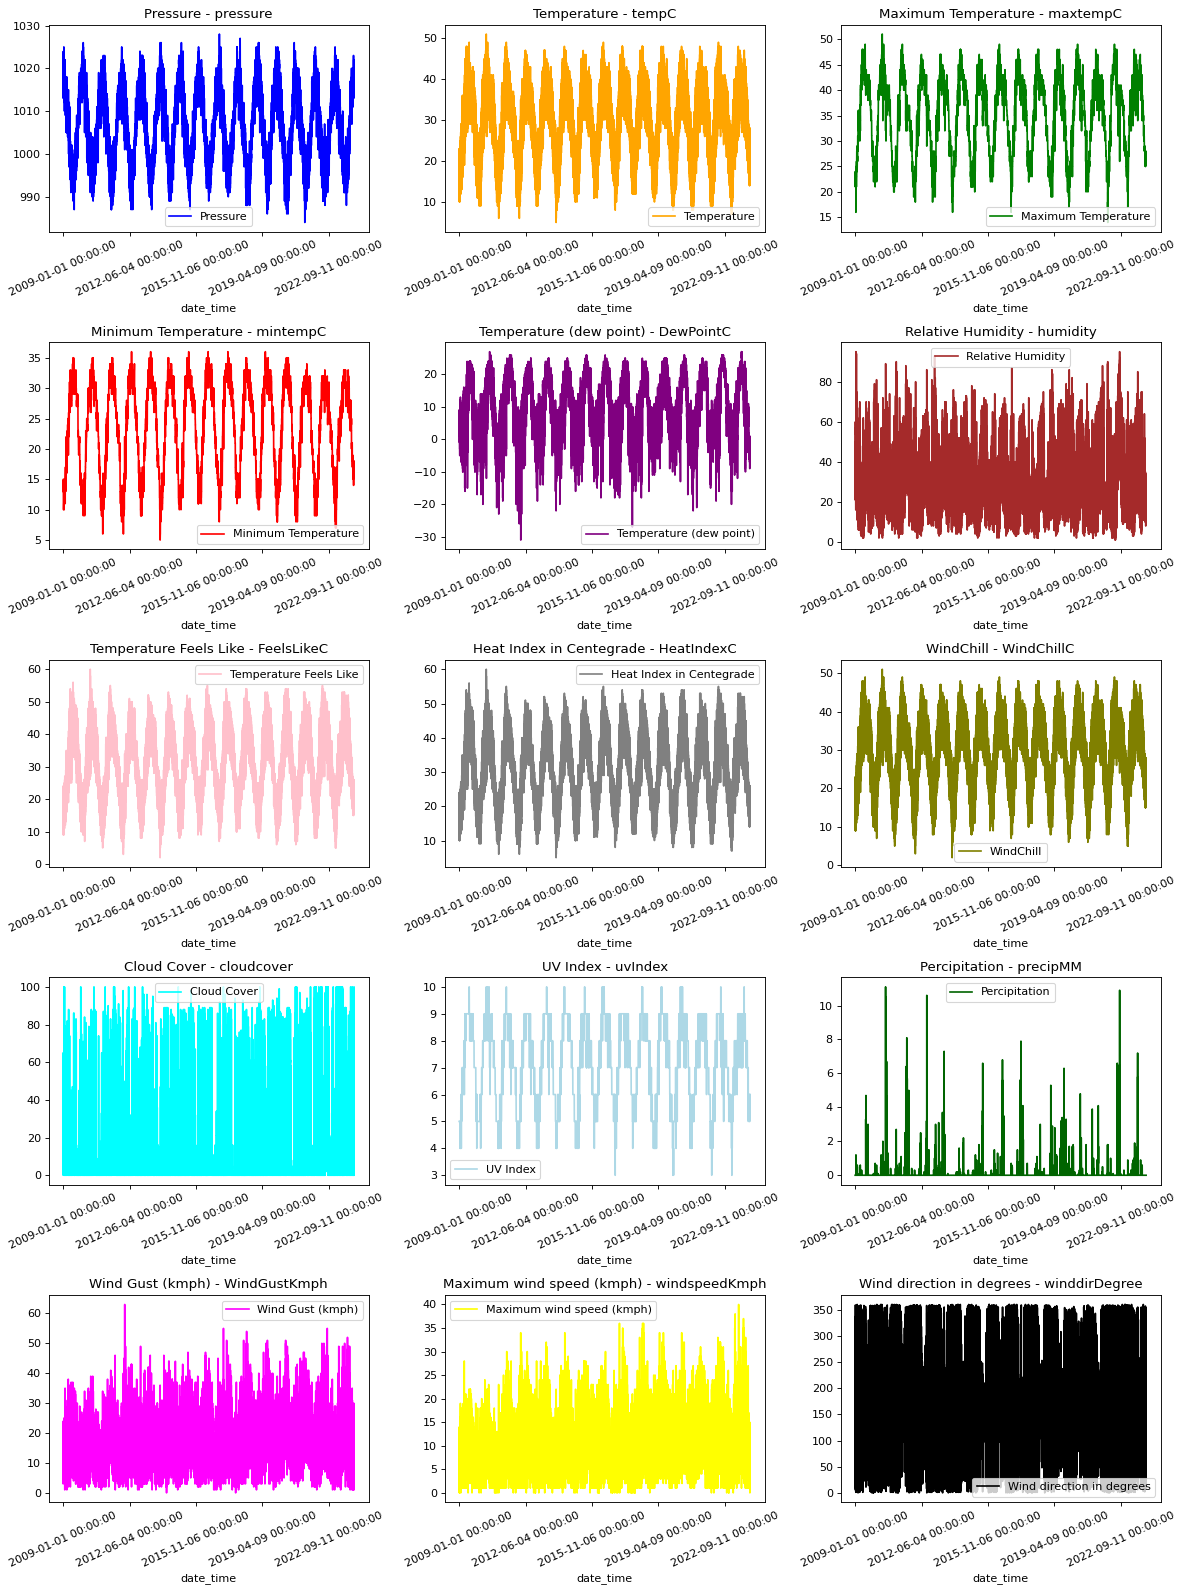

In [4]:
titles = [
    "Pressure",
    "Temperature",
    "Maximum Temperature",
    "Minimum Temperature",
    "Temperature (dew point)",
    "Relative Humidity",
    "Temperature Feels Like",
    "Heat Index in Centegrade",
    "WindChill",
    "Cloud Cover",
    "UV Index",
    "Percipitation",
    "Wind Gust (kmph)",
    "Maximum wind speed (kmph)",
    "Wind direction in degrees",
]

feature_keys = [
    "pressure",
    "tempC",
    "maxtempC",
    "mintempC",
    "DewPointC",
    "humidity",
    "FeelsLikeC",
    "HeatIndexC",
    "WindChillC",
    "cloudcover",
    "uvIndex",
    "precipMM",
    "WindGustKmph",
    "windspeedKmph",
    "winddirDegree",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "lightblue",
    "darkgreen",
    "magenta",
    "yellow",
    "black",
]

date_time_key = "date_time"



def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=5, ncols=3, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = axes[i // 3, i % 3]  # Corrected indexing
        t_data.plot(ax=ax, color=c, title="{} - {}".format(titles[i], key), rot=25)
        ax.legend([titles[i]])
    plt.tight_layout()
    plt.show()

# Assuming 'dataset' is your DataFrame
show_raw_visualization(dataset)



In [5]:
dataset.describe().round(2)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,43808.00,43808.00,43808.0,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00
mean,35.50,23.57,0.0,11.86,7.29,46.16,9.89,30.33,30.42,29.12,17.18,8.55,26.99,0.02,1006.62,29.16,9.97,161.88,10.39
std,7.44,7.41,0.0,1.71,1.53,31.26,8.98,10.02,9.92,8.69,7.53,17.27,15.47,0.27,8.31,8.61,0.28,86.70,5.37
min,14.00,5.00,0.0,1.00,3.00,0.00,-31.00,2.00,5.00,2.00,0.00,0.00,1.00,0.00,984.00,5.00,2.00,0.00,0.00
25%,29.00,17.00,0.0,11.00,6.00,18.00,3.00,23.00,24.00,23.00,12.00,0.00,15.00,0.00,1000.00,23.00,10.00,91.00,6.00
50%,37.00,25.00,0.0,12.00,8.00,46.00,9.00,30.00,30.00,30.00,16.00,2.00,24.00,0.00,1007.00,30.00,10.00,165.00,10.00
75%,42.00,30.00,0.0,13.00,9.00,73.00,18.00,38.00,38.00,36.00,22.00,8.00,36.00,0.00,1014.00,36.00,10.00,203.00,13.00
max,51.00,36.00,0.0,14.00,10.00,100.00,27.00,60.00,60.00,51.00,63.00,100.00,95.00,11.10,1028.00,51.00,10.00,360.00,40.00


In [6]:
# import pandas as pd

# # Assuming your dataset is stored in a DataFrame named 'df'
# # Convert 'date_time' column to datetime format
# dataset['date_time'] = pd.to_datetime(dataset['date_time'])

# # Extract date column
# dataset['date'] = dataset['date_time'].dt.date

# # Group by date and calculate mean for all features except 'precipMM'
# daily_avg = dataset.groupby('date').agg({
#     'maxtempC': 'mean',
#     'mintempC': 'mean',
#     'totalSnow_cm': 'mean',
#     'sunHour': 'mean',
#     'uvIndex': 'mean',
#     'moon_illumination': 'mean',
#     'tempC': 'mean',
#     'visibility': 'mean',
#     'winddirDegree': 'mean',
#     'windspeedKmph': 'mean',
#     'WindGustKmph': 'mean',
#     'cloudcover': 'mean',
#     'humidity': 'mean',
#     'pressure': 'mean',
#     'location': 'last',  # Take the last location value
# }).reset_index()

# # Sum 'precipMM' values for each day
# daily_precip_sum = dataset.groupby('date')['precipMM'].sum().reset_index()

# # Merge the daily averages and daily precipitation sums
# result_df = pd.merge(daily_avg, daily_precip_sum, on='date')

# # Print the resulting DataFrame
# print(result_df)


In [7]:
dataset.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01 00:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,7,6,46,0.0,1017,15,10,63,3,Sukkur
1,2009-01-01 03:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,10,8,47,0.0,1016,13,10,65,5,Sukkur
2,2009-01-01 06:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,11,2,46,0.0,1018,14,10,99,5,Sukkur
3,2009-01-01 09:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,3,4,28,0.0,1019,18,10,49,3,Sukkur
4,2009-01-01 12:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,9,32,23,0.0,1016,22,10,82,5,Sukkur


In [8]:
#dataset.head()
result_df = dataset
result_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01 00:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,7,6,46,0.0,1017,15,10,63,3,Sukkur
1,2009-01-01 03:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,10,8,47,0.0,1016,13,10,65,5,Sukkur
2,2009-01-01 06:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,11,2,46,0.0,1018,14,10,99,5,Sukkur
3,2009-01-01 09:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,3,4,28,0.0,1019,18,10,49,3,Sukkur
4,2009-01-01 12:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,9,32,23,0.0,1016,22,10,82,5,Sukkur


In [9]:
X = result_df.drop(['precipMM',   'moon_illumination', 'totalSnow_cm', 'moonrise', 'moonset', 'sunrise',  'sunset',  'visibility', 'sunHour',  'date_time', 'location'], axis=1)
Y = result_df['precipMM']
Y = Y.values.reshape(-1, 1)

In [10]:
# from IPython.display import Image
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(X)
# plt.show()

In [11]:
X.head()

,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,winddirDegree,windspeedKmph
0,23,13,5,3,16,15,16,7,6,46,1017,15,63,3
1,23,13,5,2,13,13,13,10,8,47,1016,13,65,5
2,23,13,5,3,15,14,15,11,2,46,1018,14,99,5
3,23,13,5,8,18,18,18,3,4,28,1019,18,49,3
4,23,13,5,9,22,24,22,9,32,23,1016,22,82,5


In [12]:
print(X)
print(Y)

       maxtempC  mintempC  uvIndex  DewPointC  FeelsLikeC  HeatIndexC  \
0            23        13        5          3          16          15   
1            23        13        5          2          13          13   
2            23        13        5          3          15          14   
3            23        13        5          8          18          18   
4            23        13        5          9          22          24   
...         ...       ...      ...        ...         ...         ...   
43803        27        16        6         -1          19          19   
43804        27        16        6         -2          24          24   
43805        27        16        6         -2          25          25   
43806        27        16        6         -2          22          22   
43807        27        16        6         -1          20          20   

       WindChillC  WindGustKmph  cloudcover  humidity  pressure  tempC  \
0              16             7           6      

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# # sc_X = StandardScaler()
# # sc_Y = StandardScaler()
# # X_scaled = sc_X.fit_transform(X)
# # Y_scaled = sc_Y.fit_transform(Y)

# MMS_X = MinMaxScaler()
# # MMS_Y = MinMaxScaler()
# X_scaled =  MMS_X.fit_transform(X)
# # Y_scaled = MMS_Y.fit_transform(Y)
# # X_scaled_dfM = pd.DataFrame(X_mm_Scalled)
# # description = X_scaled_dfM.describe().round(2)
# # description

In [14]:
from sklearn.preprocessing import StandardScaler
#scaler_X = StandardScaler()
# scaler_Y = StandardScaler()
#X_scaled = scaler_X.fit_transform(X)
# #Y_scaled = scaler_Y.fit_transform(Y)

In [15]:
# X_scaled_df = pd.DataFrame(X_scaled)
# description = X_scaled_df.describe().round(2)
# description

In [16]:
from sklearn.preprocessing import MinMaxScaler
Sc_MM = MinMaxScaler()
X_scaled = Sc_MM.fit_transform(X)

# X_scaled_dfM = pd.DataFrame(X_mm_Scalled)
# description = X_scaled_dfM.describe().round(2)
# description

In [17]:
# Split the data into training, validation, and testing sets
#X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train1, X_test, Y_train1, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, Y_train1, test_size=0.28, random_state=42)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(22078, 14)
(22078, 1)
(8587, 14)
(8587, 1)
(13143, 14)
(13143, 1)


In [19]:
X_train.shape[1]

14

In [20]:
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers
# def build_regressor():
#     regressor = Sequential()
#     regressor.add(Dense(units=17, input_dim=X_train.shape[1], activation='elu', kernel_regularizer=regularizers.l2(0.01)))
#     regressor.add(Dropout(0.5))
#     regressor.add(Dense(units=32, activation='elu', kernel_regularizer=regularizers.l2(0.01)))
#     regressor.add(Dense(units=1, activation='linear'))
#     regressor.compile(optimizer='RMSprop', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError'])
#     return regressor

In [21]:
def build_regressor():
    model = Sequential()
    model.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [23]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
# Perform K-Fold Cross-Validation
k = 5  # or your desired number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    regressor = KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=200)

    # Train the model for each fold
    history = regressor.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_scores = regressor.score(X_test, y_test)
    print(f"Test Score for Fold: {test_scores}")

<ipython-input-23-db2befeac38e>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=200)


Epoch 1/200
884/884 [==============================] - 5s 3ms/step - loss: 0.0551 - mae: 0.0590 - val_loss: 0.0429 - val_mae: 0.0571
Epoch 2/200
884/884 [==============================] - 2s 2ms/step - loss: 0.0502 - mae: 0.0524 - val_loss: 0.0396 - val_mae: 0.0402
Epoch 3/200
884/884 [==============================] - 2s 2ms/step - loss: 0.0481 - mae: 0.0480 - val_loss: 0.0389 - val_mae: 0.0512
Epoch 4/200
884/884 [==============================] - 2s 3ms/step - loss: 0.0475 - mae: 0.0492 - val_loss: 0.0381 - val_mae: 0.0535
Epoch 5/200
884/884 [==============================] - 3s 3ms/step - loss: 0.0465 - mae: 0.0476 - val_loss: 0.0371 - val_mae: 0.0415
Epoch 6/200
884/884 [==============================] - 2s 2ms/step - loss: 0.0462 - mae: 0.0476 - val_loss: 0.0367 - val_mae: 0.0362
Epoch 7/200
884/884 [==============================] - 2s 2ms/step - loss: 0.0460 - mae: 0.0457 - val_loss: 0.0369 - val_mae: 0.0350
Epoch 8/200
884/884 [==============================] - 2s 2ms/step - 

In [ ]:
# # Custom KerasRegressor wrapper
# def custom_keras_regressor():
#     return KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=200)

In [ ]:
# # Create the KerasRegressor using the custom wrapper
# regressor = custom_keras_regressor()

In [ ]:
# # Train the model
# history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val))

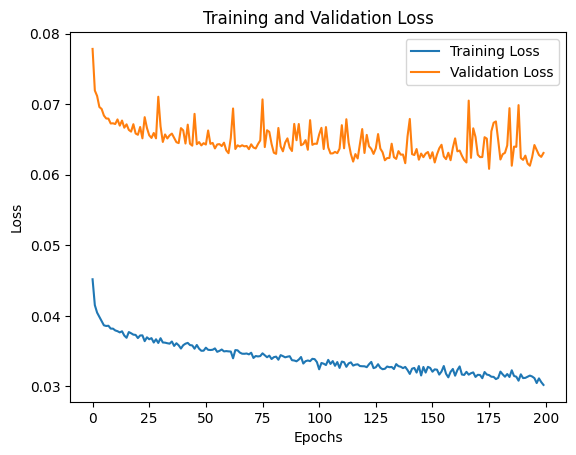

In [24]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

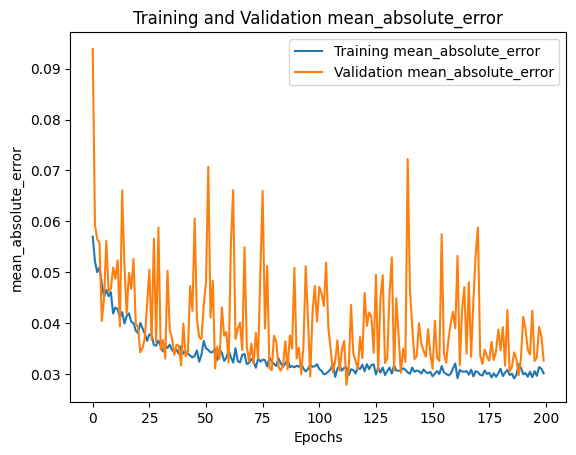

In [32]:
# Plot training loss and validation loss
plt.plot(history.history['mae'], label='Training mean_absolute_error')
plt.plot(history.history['val_mae'], label='Validation mean_absolute_error')
plt.title('Training and Validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

test_predictions = regressor.predict(X_test)

# Calculate the mean squared error
test_loss = mean_squared_error(y_test, test_predictions)
print("Test Loss:", test_loss)

658/658 [==============================] - 1s 1ms/step
Test Loss: 0.061387303280317655


In [29]:
predicted = regressor.predict(X_test)

658/658 [==============================] - 1s 1ms/step


In [30]:
for i in range(2000, 2050):
  print(f'Actual: {y_test[i][0]} : Predicted {predicted[i]}')

Actual: 0.0 : Predicted -0.0012069586664438248
Actual: 0.0 : Predicted -0.005924472585320473
Actual: 0.0 : Predicted -0.0019084159284830093
Actual: 0.0 : Predicted -0.010541247203946114
Actual: 0.0 : Predicted -0.00626608170568943
Actual: 0.0 : Predicted -0.007284531369805336
Actual: 0.0 : Predicted 0.004444276914000511
Actual: 0.0 : Predicted 0.0018529649823904037
Actual: 0.0 : Predicted -0.0014720801264047623
Actual: 0.0 : Predicted -0.009501049295067787
Actual: 0.0 : Predicted 0.007300054654479027
Actual: 0.4 : Predicted 0.9719344973564148
Actual: 0.0 : Predicted -0.011645162478089333
Actual: 0.0 : Predicted -0.0035432148724794388
Actual: 0.0 : Predicted -0.0056009236723184586
Actual: 0.0 : Predicted -0.006165379658341408
Actual: 0.0 : Predicted -0.00416114367544651
Actual: 0.0 : Predicted -0.0034733954817056656
Actual: 0.0 : Predicted 0.0001627858728170395
Actual: 0.0 : Predicted -0.0022868532687425613
Actual: 1.7 : Predicted 0.4998842775821686
Actual: 0.0 : Predicted -0.0064992252

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predictions = regressor.predict(X_test)

# Assuming Y_test contains the actual rainfall values for your test data
# Evaluate regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')


658/658 [==============================] - 1s 1ms/step
MAE: 0.03186323155248572, MSE: 0.061387303280317655, RMSE: 0.24776461264740302, R2: 0.323045803890047
